In [20]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

filename = 'TSLA.csv'# The data include seven columns from TESLA's daily stock change: Date,Open,High,Low,Close,Adj Close and Volume.
df = pd.read_csv(filename)

detail = df.info() # the details about this csv file the maximum, minmum, average, size, quantile and types
print(detail)

overview = df.describe()
print(overview)

df.duplicated() # the outcome is perfect. the data don't loss any data.
df[df.duplicated()] # checking the data have the same data or not. I think in this TESLA stock data, don't need this step.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None
              Open         High          Low        Close    Adj Close  \
count   252.000000   252.000000   252.000000   252.000000   252.000000   
mean    764.348731   779.723450   747.494485   764.646070   764.646070   
std     153.800258   158.369498   148.719534   153.989782   153.989782   
min     552.549988   566.210022   539.489990   563.000000   563.000000   
25%     664.052521   676.994995   648.377487   661.437500   661.437500   
50%     712.705017   723

AttributeError: 'DataFrame' object has no attribute 'insnull'

In [14]:
filename = 'TSLA.csv'
df = pd.read_csv(filename)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800
1,2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100
2,2020-12-18,668.900024,695.000000,628.539978,695.000000,695.000000,222126200
3,2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300
4,2020-12-22,648.000000,649.880005,614.229980,640.340027,640.340027,51716000
...,...,...,...,...,...,...,...
247,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800
248,2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000
249,2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500
250,2021-12-14,945.000000,966.409973,930.000000,958.510010,958.510010,23602100


#clean data

In [12]:
ds = df.dropna() #We can compare two dataframe ds and df, there are not Nan data in here.
ds

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800
1,2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100
2,2020-12-18,668.900024,695.000000,628.539978,695.000000,695.000000,222126200
3,2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300
4,2020-12-22,648.000000,649.880005,614.229980,640.340027,640.340027,51716000
...,...,...,...,...,...,...,...
247,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800
248,2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000
249,2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500
250,2021-12-14,945.000000,966.409973,930.000000,958.510010,958.510010,23602100


In [186]:
#show the daily change rate into a new column. The rate = (high-low)/low *100 

df.loc[:,'rate'] = (df['Close']-df['Open'])/df['Open'] * 100
#print(df)

# show daily status rise or down
def get_dailychange(x):
    if x['rate']>1:
        return 'rocket rise'
    elif 0 <= x['rate'] <= 1:
        return 'rise'
    elif -1 <= x['rate'] <0:
        return 'down'
    else:
        return 'sharply fall'
df.loc[:,"status"] = df.apply(get_dailychange, axis=1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,rate,status
0,2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800,-0.869102,down
1,2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100,4.411089,rocket rise
2,2020-12-18,668.900024,695.000000,628.539978,695.000000,695.000000,222126200,3.901925,rocket rise
3,2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300,-2.458574,sharply fall
4,2020-12-22,648.000000,649.880005,614.229980,640.340027,640.340027,51716000,-1.182095,sharply fall
...,...,...,...,...,...,...,...,...,...
247,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800,-5.359031,sharply fall
248,2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000,0.820821,rise
249,2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500,-3.464229,sharply fall
250,2021-12-14,945.000000,966.409973,930.000000,958.510010,958.510010,23602100,1.429631,rocket rise


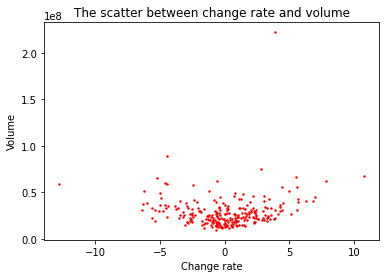

In [91]:
# the Volume and Change rate have positive or negative relationship.
x = df['rate']
z = df['Volume']
plt.figure()
plt.xlabel('rate')
plt.ylabel('Volume')
plt.title('The scatter between rate and volume')
ax = plt.gca()
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
plt.scatter(x,z,2,c='r')
# I think two values don't have strong relationship from this scatter graph. At change rate range of 
#[-2,2] the volume don't influent by the stock price. Even the lower price has higher volume. 

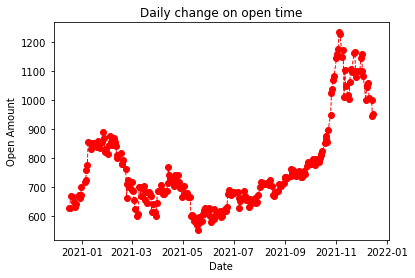

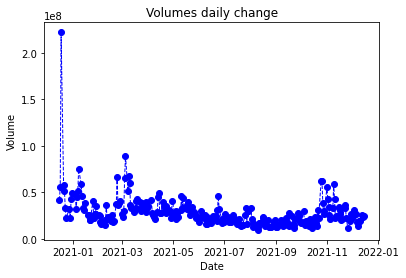

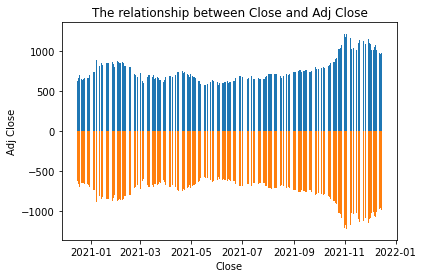

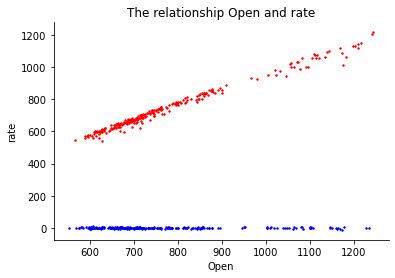

In [175]:
from time import strftime
import datetime
y = df['Open']
e = df['High']
f = df['Low']
j = df['Close']
h = df['Adj Close']
g = df['rate']
x=df['Date'] = pd.to_datetime(arg = df['Date'], #transfer the datetime and help computer to analyze them on plot
                              format='%Y %m %d')
plt.figure()
plt.xlabel('Date')
plt.ylabel('Open Amount')
plt.title('Daily change on open time')
plt.plot_date(x,y,c='r',linewidth=1,linestyle='--')

plt.figure()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volumes daily change')
plt.plot_date(x,z,c='b',linewidth=1,linestyle='--')


plt.figure()# This graph imporves the Close and Adj Close is positive relevant.
plt.xlabel('Close')
plt.ylabel('Adj Close')
plt.title('The relationship between Close and Adj Close')
plt.bar(x,+j)
plt.bar(x,-h)
# it seems the same chart in both size up and down.

plt.figure()
plt.xlabel('High')
plt.ylabel('Low')
plt.title('The relationship High and Low')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.scatter(e,f,2,c='r')
#strong relative

#2.question： we can improve in each of them Open，High，Close，Low have relativity. 
# Then, rate was caculate by Open and Close, so are Close and rate related or not.
plt.xlabel('Open')
plt.ylabel('rate')
plt.title('The relationship Open and rate')
plt.scatter(y,g,2,c='b')
plt.show()
# It shows all the points around y = 0. So that they are unrelated.

In [129]:
# Use date and close build a LinearRegression models.
from statsmodels.formula.api import ols
lm = ols('Close ~  rate', data = df).fit()
#lm = ols('Close ~ Open+( High - Low) * rate',data = df).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.888
Date:                Fri, 17 Dec 2021   Prob (F-statistic):              0.171
Time:                        16:37:03   Log-Likelihood:                -1625.4
No. Observations:                 252   AIC:                             3255.
Df Residuals:                     250   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    764.2987      9.687     78.902      0.000     745.221     783.376
rate           4.5937      3.343      1.374      0.171      -1.990      11.177
==============================================================================
Omnibus:                       50.906   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.356
Skew:                           1.276   Prob(JB):                     4.33e-17
Kurtosis:                       3.816   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#The second step, optimize the regression model.
lm = ols('Close ~ Low * rate',data = df).fit() 
lm.summary()
#From this table below, the R-squared 0.994 high enough, but i have a new thought to optimize this model become more real.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.466e+04
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          8.80e-279
Time:                        16:38:37   Log-Likelihood:                -973.22
No. Observations:                 252   AIC:                             1954.
Df Residuals:                     248   BIC:                             1969.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4019      3.755     -1.172      0.242     -11.797       2.993
Low            1.0284      0.005    208.701      0.000       1.019       1.038
rate           1.7801      1.147      1.552      0.122      -0.479       4.039
Low:rate       0.0025      0.001      1.687      0.093      -0.000       0.005
==============================================================================
Omnibus:                      116.083   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.778
Skew:                           1.930   Prob(JB):                    5.91e-103
Kurtosis:                       8.472   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
lm = ols('Close ~ Open + (High -Low) * rate',data = df).fit() 
lm.summary()
# the R-squared near 1. I think the main problem is that the crawling data has high relativity.
# So that I try to make a procast model.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.410e+06
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:20:18   Log-Likelihood:                -192.41
No. Observations:                 252   AIC:                             394.8
Df Residuals:                     247   BIC:                             412.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1035      0.171     -0.607      0.544      -0.439       0.232
Open           1.0383      0.004    282.668      0.000       1.031       1.046
High          -0.0378      0.004    -10.621      0.000      -0.045      -0.031
rate          -0.1235      0.050     -2.484      0.014      -0.222      -0.026
High:rate      0.0100   5.93e-05    169.123      0.000       0.010       0.010
==============================================================================
Omnibus:                      182.201   Durbin-Watson:                   2.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4858.094
Skew:                          -2.436   Prob(JB):                         0.00
Kurtosis:                      23.951   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
# This module I want to build a sample model to procast the current figure.
# model = Open + (High - Low)*rate
a = []
#b = df['Open']+((df['High'] - df['Low']) * df['rate']/100)
daily_volum = df['Volume']/(102*60) # total open time a week
average_volum = np.mean(daily_volum)

std_high = 158.369498
std_low = 148.719534
std_rate = 2.092534 #get from dataframe describe

#make a sample procast model: current stock price = open price+(current highest price
# - history standard Deviation)-(current lowest price - history standard low Deviation)*
# current rate
#current rate = the time of user want to procast the tendency from updating stock data.
current_price = df['Open']+((df['High']-std_high +std_low - df['Low']) * df['rate'])

print(current_price)

a.append(df['Close'] - current_price)
average_a = np.mean(a)
print(a)
# I think this model is an ideal one. But I compare the outcome of a and standard rate Deviation.
# It has a little bit realiable. The standard rate Deviation more than 0. So, this stock has a up trend.

0       612.716476
1       759.067211
2       890.568599
3       634.819339
4       617.265468
          ...     
247     790.115911
248    1032.389626
249     848.906250
250     983.256930
251    1050.834102
Length: 252, dtype: float64
[0       10.053544
1     -103.167187
2     -195.568599
3       15.040646
4       23.074559
          ...    
247    213.684077
248    -15.359597
249    117.503723
250    -24.746920
251    -74.844112
Length: 252, dtype: float64]
3.4110334569276497


# Summary about part3.

I think the main idea of part 3 is crawling the data from website and analyze.
I choose Tesla daily stock data from yahoo finance. The open, high, low, close, adj close and volumes from 6/12/2020 to 15/12/2021. 252 raws and 9 columns.
In there, I get an overview of data, the std,mean,quantiles at first. Then, I create two columns rate and status. Rate illustrates how the stock change in every day and status depends on rate to show the status of stock and get advise to people directly.
I gave three personal questions about this csv file.
 1.How the stock change? 
 I create two columns rate and status. Rate illustrates how the stock change in every day and status depends on rate to show the status of stock and get advise to people directly.
 
 2.What are their relativity in each two of them? 
 I use scatter,bar and line graphs.
 
 3.They have high relativity, the rate was caculate by open and close. So is rate relate to open or not.
 I plot scatter chat. It seems on relativity.
In the end, I try to make regression model and foresee model.
 

# Some experiences.
First, before choose your data, you should conside about the varible of every column has high relative or not. This time, I choose the stock data which has high relativity. So that, it's hard to build a regression model, the R-squared is quite high.
Second, how to clean data. Although, this time the crawled data is perfect. No None, too large or small data. But I still learn a lot of clean data.
Third, read more articles on your feild especially made model. For me, this is the first time to try to build a model, I don't have enough experiences and knowledge. Even if I read couples of papers for this topic. I think my model has many shortcomings, I will read more articles and continue to optimize it.